# Predicting COVID-19 from Chest X-Ray Images
## Problem Statement
The rapid spread of COVID-19 has posed significant challenges to healthcare systems worldwide. Early detection and diagnosis of COVID-19 are crucial for effective disease management and containment. Chest X-ray imaging is one of the widely used diagnostic tools for identifying respiratory abnormalities associated with COVID-19. However, interpreting chest X-ray images requires specialized medical expertise and is time-consuming. Therefore, there is a critical need to develop automated systems that can accurately predict the presence of COVID-19 from chest X-ray images.<br><br>
This project aims to develop a deep learning-based model for the automated prediction of COVID-19 from chest X-ray images. The model will be trained on a dataset of labeled chest X-ray images, including both COVID-19 positive and negative cases. By leveraging convolutional neural networks (CNNs) and other deep learning techniques, the model will learn to extract relevant features from chest X-ray images and differentiate between COVID-19 and non-COVID-19 cases.
#### The primary objectives of this project are:
1. Build and train a deep learning model capable of accurately predicting COVID-19 from chest X-ray images.
2. Evaluate the performance of the model using standard evaluation metrics such as accuracy.

By achieving these objectives, this project aims to provide a reliable and efficient tool for early detection and diagnosis of COVID-19, ultimately aiding healthcare professionals in making informed clinical decisions and mitigating the spread of the disease.
## Libraries

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.style as style
style.use('ggplot')
import os

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Dataset exploration

### Loading dataset

In [3]:
# Cloning the dataset from the GitHub repository
!git clone https://github.com/RishitToteja/Chext-X-ray-Images-Data-Set.git

Cloning into 'Chext-X-ray-Images-Data-Set'...
Updating files:   6% (144/2296)
Updating files:   7% (161/2296)
Updating files:   8% (184/2296)
Updating files:   9% (207/2296)
Updating files:  10% (230/2296)
Updating files:  11% (253/2296)
Updating files:  12% (276/2296)
Updating files:  13% (299/2296)
Updating files:  14% (322/2296)
Updating files:  15% (345/2296)
Updating files:  16% (368/2296)
Updating files:  17% (391/2296)
Updating files:  18% (414/2296)
Updating files:  19% (437/2296)
Updating files:  20% (460/2296)
Updating files:  21% (483/2296)
Updating files:  22% (506/2296)
Updating files:  23% (529/2296)
Updating files:  24% (552/2296)
Updating files:  25% (574/2296)
Updating files:  26% (597/2296)
Updating files:  26% (601/2296)
Updating files:  27% (620/2296)
Updating files:  28% (643/2296)
Updating files:  29% (666/2296)
Updating files:  30% (689/2296)
Updating files:  31% (712/2296)
Updating files:  32% (735/2296)
Updating files:  33% (758/2296)
Updating files:  34% (781/

In [23]:
main_dir="Chext-X-ray-Images-Data-Set/DataSet/Data"

In [24]:
# Setting train and test directory
train_dir=os.path.join(main_dir, "train")
test_dir=os.path.join(main_dir, "test")

# Setting directory for COVID and Normal images directory
train_covid_dir=os.path.join(train_dir, "COVID19")
train_normal_dir=os.path.join(train_dir, "NORMAL")

test_covid_dir=os.path.join(test_dir, "COVID19")
test_normal_dir=os.path.join(test_dir, "NORMAL")

In [25]:
# Making separate files
train_covid_names=os.listdir(train_covid_dir)
train_normal_names=os.listdir(train_normal_dir)

test_covid_names=os.listdir(test_covid_dir)
test_normal_names=os.listdir(test_normal_dir)

## Performing data visualization
This code snippet generates a grid of images with titles and displays it using matplotlib.<br><br>
This loop iterates over each image path in the merged list. For each image, it:

* Extracts the file name from the path.
* Creates a subplot in the grid based on the current row and column.
* Turns off the axis for the subplot.
* Reads and displays the image using mpimg.imread().
* Sets the title of the subplot to the file name.
* Finally, displays the image using plt.imshow().

['Chext-X-ray-Images-Data-Set/DataSet/Data\\train\\COVID19\\COVID-19 (1).jpeg', 'Chext-X-ray-Images-Data-Set/DataSet/Data\\train\\COVID19\\COVID-19 (1).png', 'Chext-X-ray-Images-Data-Set/DataSet/Data\\train\\COVID19\\COVID-19 (10).jpeg', 'Chext-X-ray-Images-Data-Set/DataSet/Data\\train\\COVID19\\COVID-19 (101).jpg', 'Chext-X-ray-Images-Data-Set/DataSet/Data\\train\\COVID19\\COVID-19 (107).jpg', 'Chext-X-ray-Images-Data-Set/DataSet/Data\\train\\COVID19\\COVID-19 (11).jpeg', 'Chext-X-ray-Images-Data-Set/DataSet/Data\\train\\COVID19\\COVID-19 (11).jpg', 'Chext-X-ray-Images-Data-Set/DataSet/Data\\train\\COVID19\\COVID-19 (12).jpeg']
['Chext-X-ray-Images-Data-Set/DataSet/Data\\train\\NORMAL\\NORMAL(0).jpg', 'Chext-X-ray-Images-Data-Set/DataSet/Data\\train\\NORMAL\\NORMAL(1).jpg', 'Chext-X-ray-Images-Data-Set/DataSet/Data\\train\\NORMAL\\NORMAL(100).jpg', 'Chext-X-ray-Images-Data-Set/DataSet/Data\\train\\NORMAL\\NORMAL(1000).jpg', 'Chext-X-ray-Images-Data-Set/DataSet/Data\\train\\NORMAL\\NOR

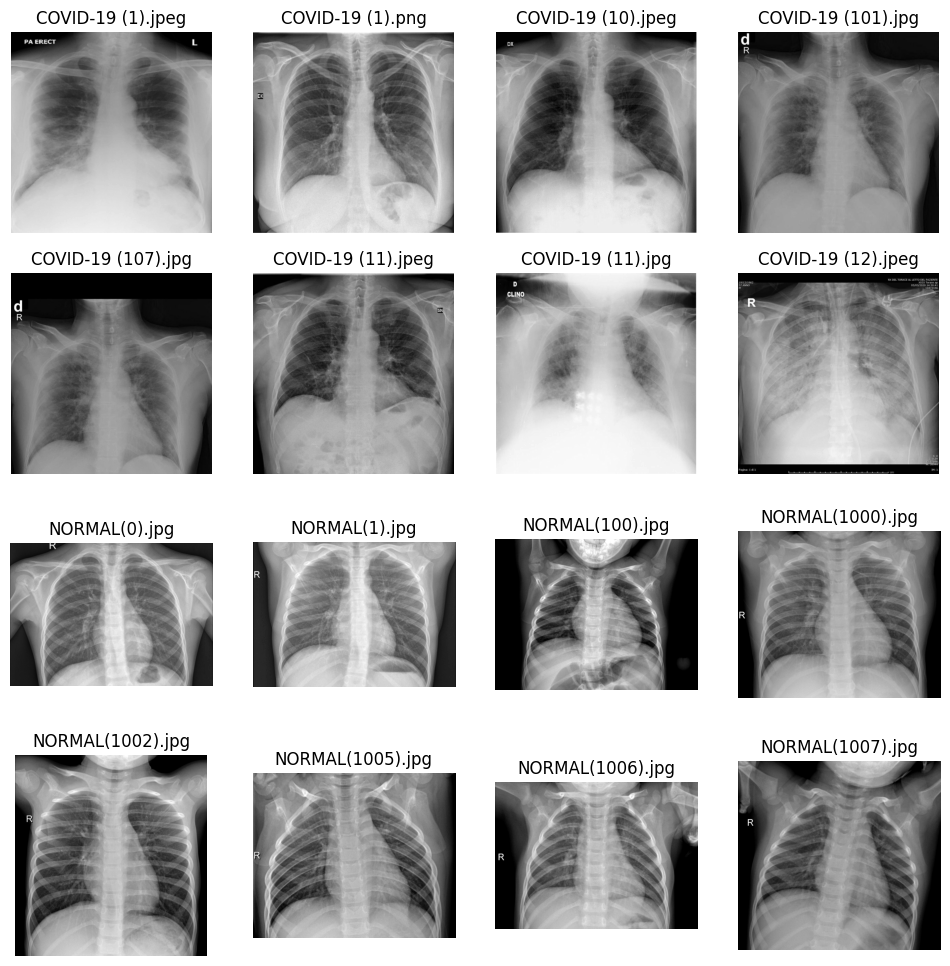

In [33]:
rows=4
columns=4

fig=plt.gcf()
fig.set_size_inches(12, 12)

covid_img=[os.path.join(train_covid_dir, filename) for filename in train_covid_names[0:8]]
normal_img=[os.path.join(train_normal_dir, filename) for filename in train_normal_names[0:8]]

print(covid_img)
print(normal_img)

merged_img=covid_img+normal_img

for i, img_path in enumerate(merged_img):
    
    title=os.path.basename(img_path)  # Gets only the filename from the path
    
    plot=plt.subplot(rows, columns, i+1)
    plot.axis("off")
    img=mpimg.imread(img_path)
    plot.set_title(title, fontsize=12)
    plt.imshow(img, cmap='gray')

plt.show()

## Data preprocessing and augmentation

This code snippet creates batches of training, testing, and validation data fro a ML model, likely a Convolutional Network (CNN), using the Keras/TensorFlow library. Let's break down the code:<br><br>
1. Creating instance of `ImageDataGenerator`for training, validation and testing:

In [34]:
dgen_train=ImageDataGenerator(rescale=1./255, validation_split=0.2, zoom_range=0.2, horizontal_flip=True)
dgen_validation=ImageDataGenerator(rescale=1./255)
dgen_test=ImageDataGenerator(rescale=1./255)

* `dgen_train`, `dgen_validation`, and `dgen_test` are instances of `ImageDataGenerator` for training, validation, and testing respectively.
* `rescale=1./255` scales the pixel values of the images to the range [0,1].
+ `validation_split=0.2` specifies that 20% of the training data will be used for validation.
* `zoom_range=0.2` specifies the range for random zooming of training images.
* `horizontal_flip=True` indicates that training images can be randomly flipped horizontally to augment the dataset and improve model generalization.<br><br>
2. Generating batches of data for training, validation, and testing:

In [35]:
train_generator=dgen_train.flow_from_directory(train_dir, target_size=(150, 150), subset='training', batch_size=32, class_mode='binary')
validation_generator=dgen_train.flow_from_directory(train_dir, target_size=(150, 150), subset='validation', batch_size=32, class_mode='binary')
test_generator=dgen_test.flow_from_directory(test_dir, target_size=(150, 150), batch_size=32, class_mode='binary')

Found 1449 images belonging to 2 classes.
Found 362 images belonging to 2 classes.
Found 484 images belonging to 2 classes.


* `flow_from_directory()` is used to load images from a directory and generate batches of data.
* `train_generator` and `validation_generator` are created from the training directory, while `test_generator` is created from the testing directory.
* `target_size=(150, 150)` specifies the size to which images should be resized.
* `subset='training'` and `subset='validation'` are used to indicate whether batches are being generated for the training or validation set, respectively.
* `batch_size=32` indicates the batch size of the data.
* `class_mode='binary'` specifies that the labels are binary (in this case, there are likely two classes, such as "COVID19" and "NORMAL").

In [37]:
print("Class Labels are: ", train_generator.class_indices)
print("Image shape is: ", train_generator.image_shape)

Class Labels are:  {'COVID19': 0, 'NORMAL': 1}
Image shape is:  (150, 150, 3)


## Building Convolutional Neural Network Model
This code defines a convolutional neural network (CNN) model using the Keras Sequential API. Let's break down each part:

1. Creating a Sequential model:

In [38]:
model=Sequential()

This initializes a Sequential model, which allows you to add layers in sequence.<br><br>
2. Adding a Convolutional layer (1st layer):

In [39]:
model.add(Conv2D(32, (5, 5), padding='same', activation='relu', input_shape=train_generator.image_shape))

* This adds a 2D convolutional layer with 32 filters, each of size 5x5.
* `padding="same"` ensures that the output has the same spatial dimensions as the input.
* `activation="relu"` applies the Rectified Linear Unit activation function.
* `input_shape=train_generator.image_shape` specifies the shape of the input data.<br><br>
3. Adding a MaxPooling layer (1st layer):

In [40]:
model.add(MaxPooling2D(pool_size=(2, 2)))

This adds a 2D max pooling layer with a pool size of 2x2.<br><br>
4. Adding a Dropout layer (2nd layer):

In [41]:
model.add(Dropout(0.5))

This adds a dropout layer with a dropout rate of 0.5, which helps prevent overfitting.<br><br>
5. Adding another Convolutional layer (2nd layer):

In [42]:
model.add(Conv2D(64, (5, 5), padding='same', activation='relu'))

Similar to the 1st layer, this adds another convolutional layer with 64 filters.<br><br>
6. Adding another MaxPooling layer (2nd layer):

In [43]:
model.add(MaxPooling2D(pool_size=(2, 2)))

This adds another max pooling layer with the same pool size.<br><br>
7. Adding another Dropout layer (3rd layer):

In [44]:
model.add(Dropout(0.5))

8. Flattening the output to 2D shape:

In [45]:
model.add(Flatten())

This flattens the output from the convolutional layers into a 1D array.<br><br>
9. Adding a Dense layer:

In [46]:
model.add(Dense(256, activation='relu'))

This adds a fully connected (Dense) layer with 256 neurons and ReLU activation.<br><br>
10. Adding another Dropout layer (4th layer):

In [47]:
model.add(Dropout(0.5))

11. Adding the final output layer:

In [48]:
model.add(Dense(1, activation='sigmoid'))

This adds the output layer with a single neuron and sigmoid activation, suitable for binary classification tasks.<br><br>
12. Printing model summary:<br>
* This prints a summary of the model architecture, including the type and shape of each layer, as well as the number of trainable parameters. It provides a concise overview of the entire model structure.

In [49]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2  (None, 75, 75, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 75, 75, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        51264     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 37, 37, 64)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 37, 37, 64)        0

## Compiling and Training the Neural Network Model
### Compiling the model
This line of code compiles the previously defined neural network model. Let's break it down:
1. `model.compile()`: This function configures the model for training.
2. `Adam(learning_rate = 0.001)`: Adam is an optimization algorithm, and here it is being instantiated with a learning rate of 0.001. Adam is a popular choice for optimizing neural networks due to its adaptive learning rate capabilities.
3. `loss = 'binary_crossentropy'`: This specifies the loss function to use during training. In this case, `binary_crossentropy` is chosen, which is commonly used for binary classification problems. It measures the difference between the true labels and the predicted probabilities.
4. `metrics = ['accuracy']`: This specifies the evaluation metric to use. During training, the model will keep track of this metric's performance. 'accuracy' is chosen here, which measures the proportion of correctly classified samples.

In [50]:
model.compile(Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

### Training the model
This line of code trains the neural network model using the training data generator `train_generator` and evaluates the model's performance on the validation data generator `validation_generator`.

In [51]:
history=model.fit(train_generator, epochs=35, validation_data=validation_generator)

Epoch 1/35
46/46 [==============================] - 75s 2s/step - loss: 1.1470 - accuracy: 0.7529 - val_loss: 0.4663 - val_accuracy: 0.7983
Epoch 2/35
46/46 [==============================] - 59s 1s/step - loss: 0.2396 - accuracy: 0.9082 - val_loss: 0.2358 - val_accuracy: 0.9530
Epoch 3/35
46/46 [==============================] - 58s 1s/step - loss: 0.1866 - accuracy: 0.9344 - val_loss: 0.1895 - val_accuracy: 0.9530
Epoch 4/35
46/46 [==============================] - 61s 1s/step - loss: 0.1622 - accuracy: 0.9489 - val_loss: 0.2065 - val_accuracy: 0.9696
Epoch 5/35
46/46 [==============================] - 60s 1s/step - loss: 0.1607 - accuracy: 0.9448 - val_loss: 0.1495 - val_accuracy: 0.9586
Epoch 6/35
46/46 [==============================] - 58s 1s/step - loss: 0.1308 - accuracy: 0.9524 - val_loss: 0.1152 - val_accuracy: 0.9613
Epoch 7/35
46/46 [==============================] - 59s 1s/step - loss: 0.1314 - accuracy: 0.9558 - val_loss: 0.1110 - val_accuracy: 0.9641
Epoch 8/35
46/46 [==

### Performing evaluation

In [53]:
# Keys of history object
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

A graph between __training and validation loss__ is a visualization that shows how the loss of a machine learning model changes over the course of training epochs for both the training and validation datasets. Let's break down the components:

1. __Training Loss:__
    * The training loss represents the error of the model on the training dataset. It is calculated during each training epoch as the difference between the model's predicted outputs and the actual ground truth labels for the training data.
    * The training loss provides insight into how well the model is fitting the training data. Initially, the training loss may be high, but it should decrease as the model learns to make better predictions.

2. __Validation Loss:__
    * The validation loss represents the error of the model on a separate validation dataset that the model has not seen during training. It is calculated during each epoch using the validation dataset.
    * The validation loss serves as an estimate of how well the model will perform on unseen data. It helps to monitor the model's generalization ability and detect overfitting.
    * Overfitting occurs when the model performs well on the training data but poorly on unseen data. This is often indicated by a decrease in training loss but an increase in validation loss.

3. __Graph Visualization:__
    * The graph visualizes the training and validation loss over the course of training epochs. Typically, the x-axis represents the number of training epochs, while the y-axis represents the loss value.
    * As training progresses, you can observe how both the training and validation loss change. Ideally, both losses should decrease steadily. However, if the training loss decreases while the validation loss increases or remains stagnant, it indicates overfitting.
    * By observing the trend of the losses on the graph, you can make decisions about whether to adjust the model architecture, regularization techniques, or hyperparameters to improve performance and prevent overfitting.

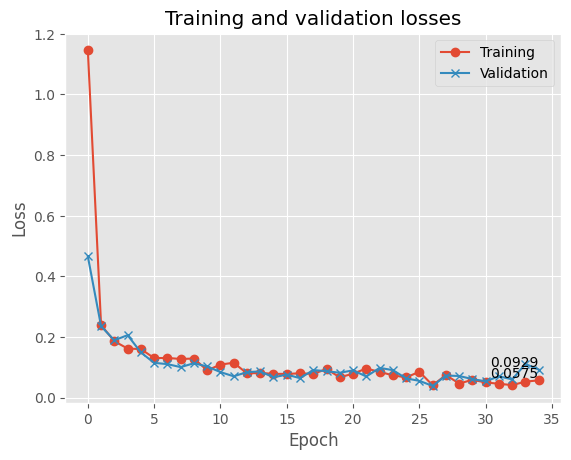

In [60]:
# Plot training and validation losses
plt.plot(history.history['loss'], marker='o')
plt.plot(history.history['val_loss'], marker='x')

# Display legend, title, and axis labels
plt.legend(['Training', 'Validation'])
plt.title("Training and validation losses")
plt.xlabel('Epoch')
plt.ylabel('Loss')

# Display the value of the last point
plt.text(len(history.history['loss']) - 1, history.history['loss'][-1], f'{history.history["loss"][-1]:.4f}', ha='right', va='bottom')
plt.text(len(history.history['val_loss']) - 1, history.history['val_loss'][-1], f'{history.history["val_loss"][-1]:.4f}', ha='right', va='bottom')

# Show plot
plt.show()

A graph between __training and validation accuracy__ visualizes how the accuracy of a machine learning model changes over the course of training epochs for both the training and validation datasets. Let's break down the components:

1. __Training Accuracy:__
    * The training accuracy represents the proportion of correctly classified samples in the training dataset. It is calculated during each training epoch based on the model's predictions and the true labels of the training data.
    * The training accuracy provides insight into how well the model is fitting the training data. Initially, the training accuracy may be low, but it should increase as the model learns to make better predictions.

2. __Validation Accuracy:__
    * The validation accuracy represents the proportion of correctly classified samples in a separate validation dataset that the model has not seen during training. It is calculated during each epoch using the validation dataset.
    * The validation accuracy serves as an estimate of how well the model will perform on unseen data. It helps to monitor the model's generalization ability and detect overfitting.
    * _Overfitting_ occurs when the model performs well on the training data but poorly on unseen data. This is often indicated by a high training accuracy but a lower validation accuracy.

3. __Graph Visualization:__
    * The graph visualizes the training and validation accuracy over the course of training epochs. Typically, the x-axis represents the number of training epochs, while the y-axis represents the accuracy value.
    * As training progresses, you can observe how both the training and validation accuracy change. Ideally, both accuracies should increase steadily. However, if the training accuracy increases while the validation accuracy decreases or remains stagnant, it indicates overfitting.
    * By observing the trend of the accuracies on the graph, you can make decisions about whether to adjust the model architecture, regularization techniques, or hyperparameters to improve performance and prevent overfitting.

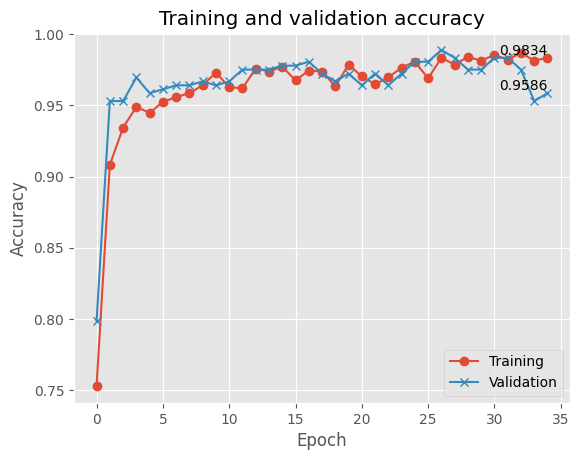

In [61]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], marker='o')
plt.plot(history.history['val_accuracy'], marker='x')

# Display legend, title, and axis labels
plt.legend(['Training', 'Validation'])
plt.title("Training and validation accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

# Display the value of the last point
plt.text(len(history.history['accuracy']) - 1, history.history['accuracy'][-1], f'{history.history["accuracy"][-1]:.4f}', ha='right', va='bottom')
plt.text(len(history.history['val_accuracy']) - 1, history.history['val_accuracy'][-1], f'{history.history["val_accuracy"][-1]:.4f}', ha='right', va='bottom')

# Show plot
plt.show()

In [62]:
# Getting test accuracy and loss
test_loss, test_acc=model.evaluate(test_generator)
print(f"Test Set Loss: {np.round(test_loss, 4)}")
print(f"Test Set Accuracy: {np.round(test_acc, 4)}")

16/16 [==============================] - 15s 972ms/step - loss: 0.1450 - accuracy: 0.9380
Test Set Loss: 0.145
Test Set Accuracy: 0.938


## Prediction on new data

In [66]:
# Directory where the test images are located
testing_dir='testing'

# List to store the predictions
predictions=[]

# Iterate over each file in the testing directory
for filename in os.listdir(testing_dir):
    # Full path of the image
    img_path=os.path.join(testing_dir, filename)
    # Load the image from the local path
    img=image.load_img(img_path, target_size=(150, 150))
    # Convert the image to a numpy array
    images=image.img_to_array(img)
    # Add an additional dimension for the batch
    images=np.expand_dims(images, axis=0)
    
    # Make prediction with the model and store the result
    prediction=model.predict(images)
    predictions.append((filename, prediction))

1/1 [==============================] - 0s 42ms/step


In [71]:
for item in predictions:
    if item[1]==0:
        print(f"The report is COVID-19 Positive for {item[0]}")
    else:
        print(f"The report is COVID-19 Negative for {item[0]}")

The report is COVID-19 Positive for COVID19(153).jpg
The report is COVID-19 Negative for NORMAL(460).jpg


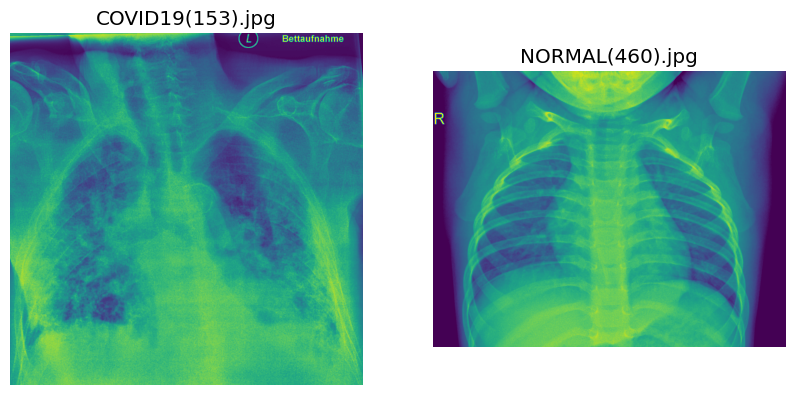

In [77]:
# Get the list of image file names in the testing directory
image_files=os.listdir(testing_dir)

# Set up the figure and axes of the plot
plt.figure(figsize=(10, 5))

# Iterate over each image file and display it in the plot
for i, image_file in enumerate(image_files, 1):
    # Get the full path of the image
    image_path=os.path.join(testing_dir, image_file)
    img=mpimg.imread(image_path)
    title=os.path.basename(img_path)
    plt.subplot(1, len(image_files), i)
    plt.imshow(img)
    plt.axis('off')
    plt.title(image_file)

# Show the plot with the images
plt.show()

## Saving model

In [72]:
model.save("model.h5")